In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mice = combined_data[combined_data["Mouse ID"].isin(duplicate_ids)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_id = 'g989'
clean_data = combined_data[combined_data["Mouse ID"] != duplicate_id]
print(clean_data['Sex'].isnull().sum())

clean_data

0


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data = clean_data["Mouse ID"].nunique()
clean_mouse_data

248

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = drug_group["Tumor Volume (mm3)"].mean()
median = drug_group["Tumor Volume (mm3)"].median()
variance = drug_group["Tumor Volume (mm3)"].var(ddof=0)
std = drug_group["Tumor Volume (mm3)"].std()
sem = drug_group["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_group = clean_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
stats = pd.DataFrame({
    "Drug Regimen": mean.index,
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Standard Deviation": std,
    "Tumor Volume SEM": sem,
})

# Assemble the resulting series into a single summary DataFrame.
stats = stats[['Mean Tumor Volume', 'Median Tumor Volume','Tumor Volume Variance', 'Tumor Volume Standard Deviation', 'Tumor Volume SEM']]

stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.268188,0.469821
Infubinol,52.884795,51.820584,42.886388,6.567243,0.492236
Ketapril,55.235638,53.698743,68.188930,8.279709,0.603860
Naftisol,54.331565,52.509285,65.817708,8.134708,0.596466
Placebo,54.033581,52.288934,60.830138,7.821003,0.581331
Propriva,52.320930,50.446266,43.555716,6.622085,0.544332
Ramicane,40.216745,40.673236,23.383692,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.710419,0.573111


In [41]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    **{
    "mean": "mean",
    "median":"median",
    "var": lambda x: x.var(ddof=0),
    "std": "std",
    "sem":"sem"
    }
).reset_index()

#Setting "drug_regimen" as the index
stats.set_index("Drug Regimen", inplace=True)

#Header
stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.268188,0.469821
Infubinol,52.884795,51.820584,42.886388,6.567243,0.492236
Ketapril,55.235638,53.698743,68.188930,8.279709,0.603860
Naftisol,54.331565,52.509285,65.817708,8.134708,0.596466
Placebo,54.033581,52.288934,60.830138,7.821003,0.581331
Propriva,52.320930,50.446266,43.555716,6.622085,0.544332
Ramicane,40.216745,40.673236,23.383692,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.710419,0.573111


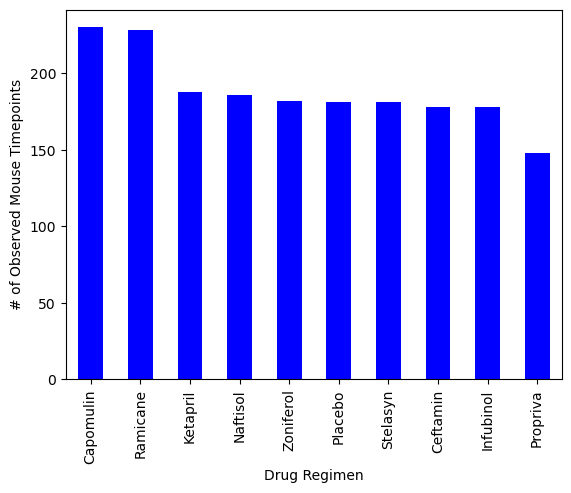

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Groupby method
drug_regimen = clean_data.groupby("Drug Regimen").size()

#Sorting the bar graph
drug_regimen_sorted = drug_regimen.sort_values(ascending=False)

#generating the bar graph using pandas
drug_regimen_sorted.plot(kind='bar', color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

#Display
plt.show()

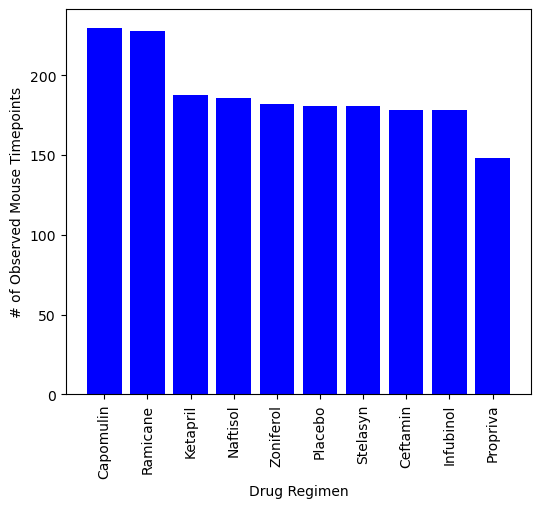

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Groupby method
drug_regimen = clean_data.groupby("Drug Regimen").size()

#Sorting the bar graph
drug_regimen_sorted = drug_regimen.sort_values(ascending=False)

#generating the bar graph using pyplot
plt.figure(figsize=(6, 5))
plt.bar(drug_regimen_sorted.index, drug_regimen_sorted.values, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

#Display
plt.show()

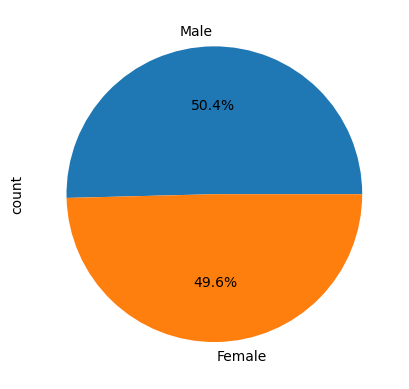

In [44]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

#Dropping any duplicates that may skew the data
gender_of_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender = gender_of_mice.groupby("Sex").size()

#Sorting the graph so male displays on top
gender_sorted = gender.sort_values(ascending=False)

# Make the pie chart
gender_sorted.plot(kind='pie',
                    autopct='%1.1f%%'
                    )
plt.ylabel('count')

#Display Pie Chart
plt.show()

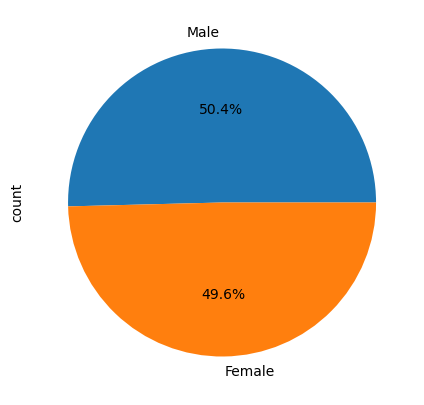

In [52]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = gender_of_mice.groupby("Sex").size()

#Sorting the graph so male displays on top
gender_sorted = gender.sort_values(ascending=False)

# Make the pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_sorted,
        labels=gender_sorted.index,
        autopct='%1.1f%%'
        )
plt.ylabel('count')

#Display pie chart
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Filtering the data in "clean_data" and identifying "Drug Regimen" in "treatment_regimens"
filtered_data = clean_data[clean_data["Drug Regimen"].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, filtered_data, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volumes = merged_data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

#Display df
final_tumor_volumes

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [53]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Put treatments into a list for for loop (and later for plot labels)
for regimen in treatment_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    tumor_vol_data.append(regimen_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = regimen_data.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Display results
    print(f"{regimen}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


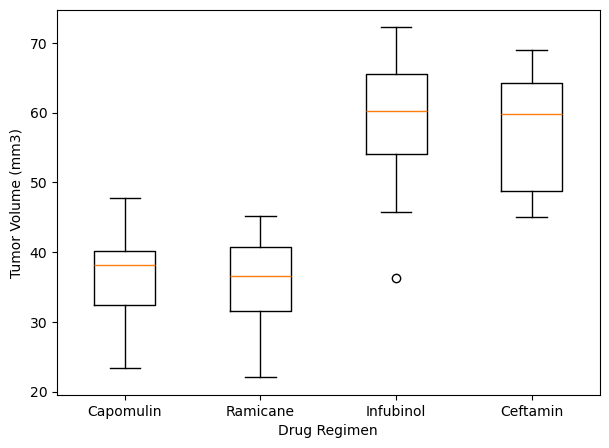

In [70]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# #Sorting the box plot into the correct order

regimen_order = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

box_plot = [final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == regimen]["Tumor Volume (mm3)"]
                for regimen in regimen_order]
# creating box plot
plt.figure(figsize=(7, 5))
plt.boxplot(box_plot, labels=regimen_order, vert=True)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

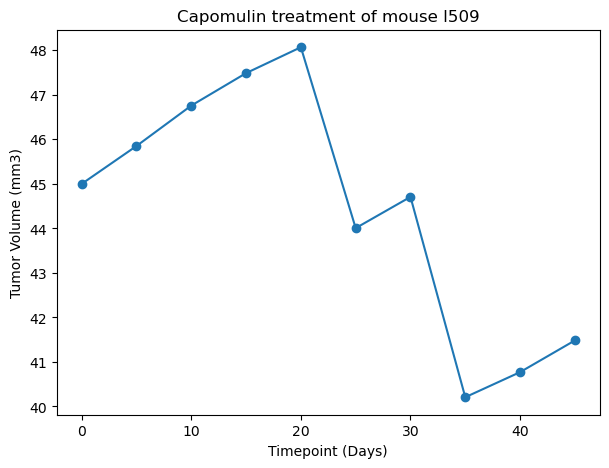

In [74]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
mouse_id = "l509"
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# creating line graph
plt.figure(figsize=(7, 5))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()

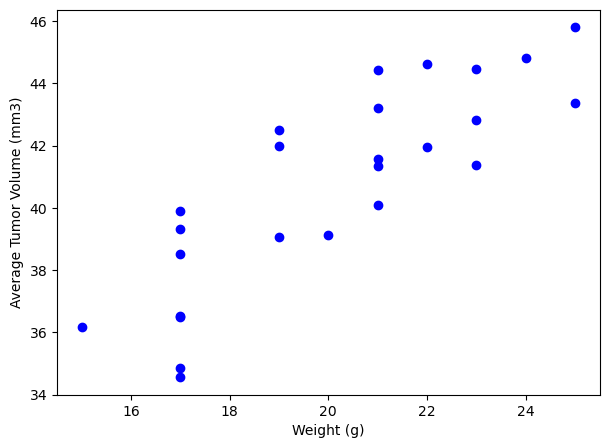

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_volume_df = avg_tumor_volume.reset_index()
avg_tumor_volume_with_weight = pd.merge(avg_tumor_volume_df, mouse_metadata, on="Mouse ID")

# creating scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(avg_tumor_volume_with_weight["Weight (g)"], avg_tumor_volume_with_weight["Tumor Volume (mm3)"], color='blue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


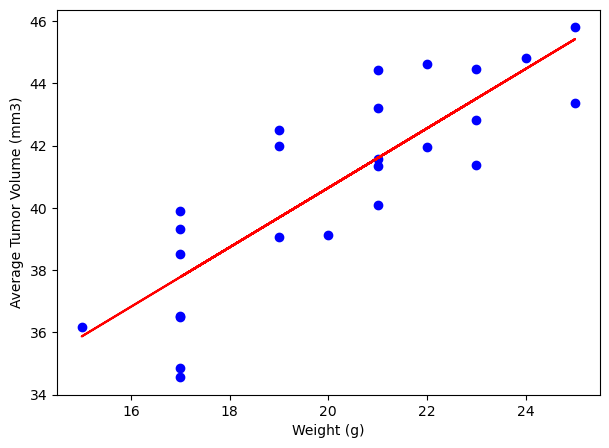

In [94]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume_df = avg_tumor_volume.reset_index()

avg_tumor_volume_with_weight = pd.merge(avg_tumor_volume_df, mouse_metadata, on="Mouse ID")

correlation = avg_tumor_volume_with_weight["Weight (g)"].corr(avg_tumor_volume_with_weight["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = st.linregress(
    avg_tumor_volume_with_weight["Weight (g)"],
    avg_tumor_volume_with_weight["Tumor Volume (mm3)"]
)
# creating scatter plot and linear regression model
plt.figure(figsize=(7, 5))
plt.scatter(avg_tumor_volume_with_weight["Weight (g)"], avg_tumor_volume_with_weight["Tumor Volume (mm3)"], color='blue')
regression_line = slope * avg_tumor_volume_with_weight["Weight (g)"] + intercept
plt.plot(avg_tumor_volume_with_weight["Weight (g)"], regression_line, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#display
plt.show()